# Introduction to Probability

Ransalu Senanayake

# 1 Probability Distributions

## 1.1 Continuous random variables

Some of the methods in scipy.stats library for random variables include,
* rvs: Random Variates
* pdf/pmf: Probability Density/Mass Function
* cdf: Cumulative Distribution Function
* stats: Return mean, variance, (Fisher’s) skew, or (Fisher’s) kurtosis
* moment: non-central moments of the distribution

In [1]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

from scipy import stats as st

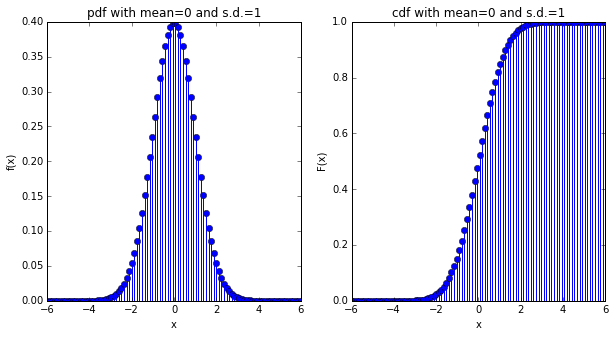

In [12]:
mean, sd = 0, 1
x = np.linspace(mean - 6*sd, mean + 6*sd, 100)
f = st.norm.pdf(x=x, loc=mean, scale=sd)
F = st.norm.cdf(x=x, loc=mean, scale=sd)

pl.figure(figsize=(10,5))
pl.subplot(121)
pl.stem(x, f); pl.xlabel('x'); pl.ylabel('f(x)'); pl.title('pdf with mean={} and s.d.={}'.format(mean, sd))
pl.subplot(122)
pl.stem(x, F); pl.xlabel('x'); pl.ylabel('F(x)'); pl.title('cdf with mean={} and s.d.={}'.format(mean, sd))
pl.show()

**Exercise 1.1.1** Change location and scale parameters (e.g. loc=1, scale=0.25) and observe results.

## 1.2 Discrete random variables

**Exercise 1.2.1** In an urn which contains M=100 different currency bills, n=25 bills are Australian dollars. Plot the pmf and cdf if N=15 bills are randomly drawn *without replacement*.

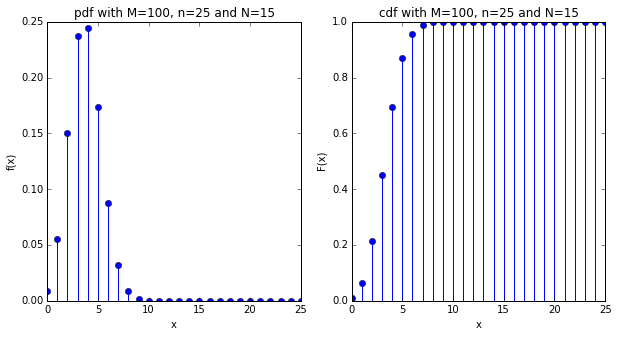

In [13]:
#Answer
M, n, N = 100, 25, 15 #Population, Successes, No of draws
x = np.arange(0, n+1)
f = st.hypergeom.pmf(x, M, n, N)
F = st.hypergeom.cdf(x, M, n, N)

pl.figure(figsize=(10,5))
pl.subplot(121)
pl.stem(x, f); pl.xlabel('x'); pl.ylabel('f(x)'); pl.title('pdf with M={}, n={} and N={}'.format(M, n, N))
pl.subplot(122)
pl.stem(x, F); pl.xlabel('x'); pl.ylabel('F(x)'); pl.title('cdf with M={}, n={} and N={}'.format(M, n, N))
pl.show()

#2. Sampling

## 2.1 Pseudo-random number generators (PRNG)

**Exercise 2.1.1** Discuss how random numbers are generated in a computer (Turing machine). 

## 2.2 Sampling from a distribution

Normal distribution

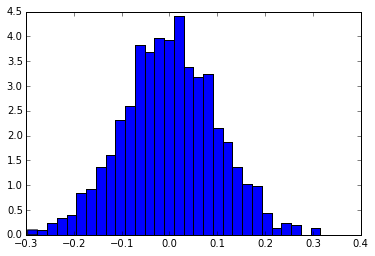

In [14]:
mu, sigma = 0, 0.1 # mean and standard deviation
samples = np.random.normal(mu, sigma, 1000) # or use scipy.stats.rvs(size=1000)

count, bins, ignored = pl.hist(samples, bins=30, normed=True)
pl.show()

Multivaraiate normal

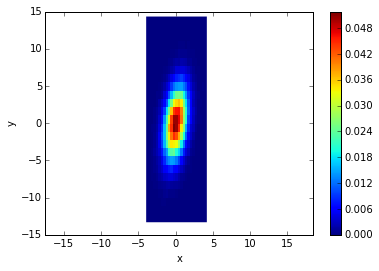

In [15]:
mean = (0, 0)
cov = [[1, 1], [1, 10]]
x, y = np.random.multivariate_normal(mean, cov, 100000).T

#pl.scatter(x, y)
pl.hist2d(x, y, 25, normed=True) #hexbin
pl.xlabel('x'); pl.ylabel('y')
pl.colorbar()
pl.axis('equal')
pl.show()
del x, y

**Exercise 2.2.1** Observe the probability distribution by varying mean and covariance.

## 2.2 Monte Carlo (MC) methods - optional 

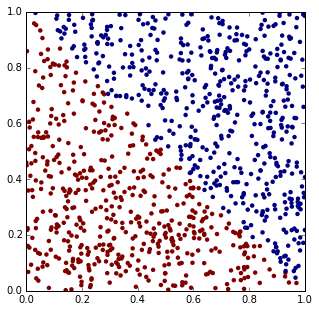

Number of samples = 1000
Number of samples that satisfies the condition = 500
Proportion of samples that satisfies the condition = 0.5


In [16]:
N = 1000
x_samples, y_samples = np.random.random(N), np.random.random(N) 

condition = x_samples + y_samples < 1

pl.figure(figsize=(5,5))
pl.scatter(x_samples, y_samples, c=condition, edgecolor='')
pl.axis([0, 1, 0, 1])
pl.show()

print('Number of samples = {}'.format(N))  
print('Number of samples that satisfies the condition = {}'.format(np.count_nonzero(condition)))  
print('Proportion of samples that satisfies the condition = {}'.format(np.count_nonzero(condition)/N)) 

**Exercise 2.2.1** Vary the number of samples $N$ and observe results.

**Exercise 2.2.2** Use Monte Carlo simulation to estimate the value of $\pi$.

Hint: The equation of a circle is $x^2 + y^2 = r^2$ and area is $\pi r^2$.

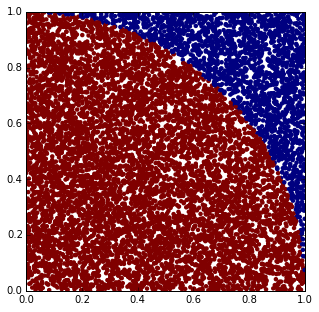

Number of samples inside the square = 10000
Number of samples inside the quarter-circle = 7832
Value of pi = 3.1328


In [26]:
#Answer
N = 10000
x_samples, y_samples = np.random.random(N), np.random.random(N) 

condition = x_samples**2 + y_samples**2 < 1

pl.figure(figsize=(5,5))
pl.scatter(x_samples, y_samples, c=condition, edgecolor='')
pl.axis([0, 1, 0, 1])
pl.show()

print('Number of samples inside the square = {}'.format(N))  
print('Number of samples inside the quarter-circle = {}'.format(np.count_nonzero(condition)))  
print('Value of pi = {}'.format(4*np.count_nonzero(condition)/N )) 

## 2.4 Central Limit Theorem (CLT) - optional 

Crude idea:
The distibution of averaging of N random varaibles, each having a mean $\mu$ and variance $\sigma^2$, follows a normal distibution with mean $\mu$ and variance $\sigma^2/N$ as N increases.

Theorem - Let $X_1, X_2,...,X_N$ be a sequence of *iid* (independent and identically distributed) random variables (discrete or continuous). Let $E[X_i] = \mu$ and $Var[X_i] = \sigma^2  > 0$ and both are finite (*moment-generating-function* exists). As $N \to \infty$ the sample average $\bar{X}_n = (1/n)\Sigma_{i=1}^{N} \xrightarrow{a.s.} \mu$.

Laws of Large Numbers:
* Definition - Convergence in probability:
A sequence of random variables $X_1, X_2,...,X_N$ *converges in probability* to a random variable $X$ if, 
\begin{equation}
    \lim_{N\to\infty}P(|X_N-X|<\epsilon) = 1, \forall \epsilon>0
\end{equation}

* Theorem - Weak Law of Large Numbers (WLLN):
Let $X_1, X_2,...,X_N$ be a sequence of *iid* random variables. Let $\mathrm{E}[X_i] = \mu$ and $\mathrm{Var}[X_i] = \sigma^2  > 0$ (both are finite). Define $\bar{X}_n = (1/n)\Sigma_{i=1}^{N}$. 
\begin{equation}
    \lim_{N\to\infty}P(|\bar{X}_N-\mu|<\epsilon) = 1, \forall \epsilon>0
\end{equation}
i.e. $\bar{X}_N$ converges in probability to $\mu$.

* Theorem - Strong Law of Large Numbers (SLLN):
Let $X_1, X_2,...,X_N$ be a sequence of *iid* random variables. Let $\mathrm{E}[X_i] = \mu$ and $\mathrm{Var}[X_i] = \sigma^2  > 0$ (both are finite). Define $\bar{X}_n = (1/n)\Sigma_{i=1}^{N}$. 
\begin{equation}
    P(\lim_{N\to\infty}|X_N-X|<\epsilon) = 1, \forall \epsilon>0
\end{equation}
i.e. $\bar{X}_N$ converges *almost surely (a.s.)* (meaning, with probability = 1) to $\mu$.

Note: assumption of finite variance can be relaxed.

Note: In order for SLLN to hold P should converge pointwise (limit is inside P). SLLN $\implies$ WLLN. 

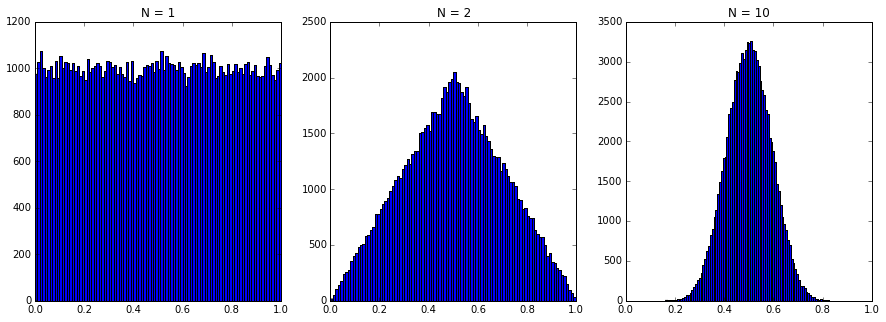

In [18]:
N = 10
x = np.random.random((N, 1E5)) #np.random.beta(10, 0.5,(N, 1E5)) change N to 100

pl.figure(figsize=(15,5))

Na = 1
pl.subplot(131)
pl.hist(x[:Na, :].mean(0), 100) #let the bin size be 100
#pl.axis([0, 1, 0, None])
pl.title('N = {}'.format(Na))

pl.subplot(132)
Nb = 2
pl.hist(x[:Nb, :].mean(0), 100)
pl.axis([0, 1, 0, None])
pl.title('N = {}'.format(Nb))

pl.subplot(133)
Nc = N
pl.hist(x[:Nc, :].mean(0), 100)
pl.axis([0, 1, 0, None])
pl.title('N = {}'.format(Nc))

pl.show()
del x

#3. Information Theory

##3.1 Entropy 

Entropy is a measure of uncertainty.
\begin{equation}
    \mathrm{H}[x] := \sum_x p(x)log_n \frac{1}{p(x)} = -\sum_x p(x)log_n \big( p(x) \big)
\end{equation}

If n=2, the unit of measurement is in bits.

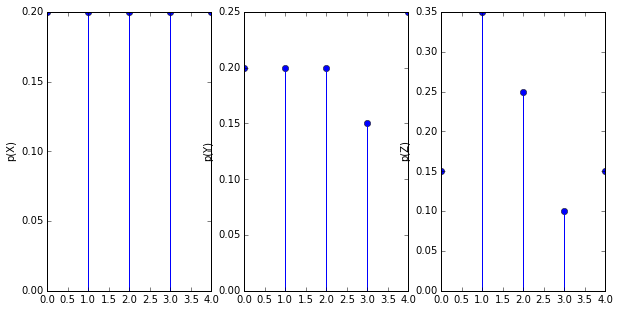

2.32192809489 2.30370169606 2.18338309823


In [19]:
#Observe how Entropy changes with the spread of data 
X = np.arange(5)
Z = Y = X 

pX = np.array([ 0.2, 0.2, 0.2, 0.2, 0.2])
pY = np.array([ 0.2, 0.2, 0.2, 0.15, 0.25])
pZ = np.array([ 0.15, 0.35, 0.25, 0.1, 0.15])

pl.figure(figsize=(10,5))
pl.subplot(131)
pl.stem(X, pX) 
pl.ylabel('p(X)')

pl.subplot(132)
pl.stem(Y, pY)
pl.ylabel('p(Y)')

pl.subplot(133)
pl.stem(Z, pZ)
pl.ylabel('p(Z)')

pl.show()

def calc_entropy(p):
    return -np.sum(p*np.log2(p)) #from scipy import stats as st; st.entropy(pX, base=2)

print(calc_entropy(pX), calc_entropy(pY), calc_entropy(pZ))

**Exercise 3.1.1** Consider the Bernoulli trial of tossing a coin (unfair coin) with event space X. Let $p(X=1)$ be the probability of obtaining a head. Calculate the entopy for $p(X=1) \in [0,1]$ and show that entopy decreases as the uncertainty decreases.

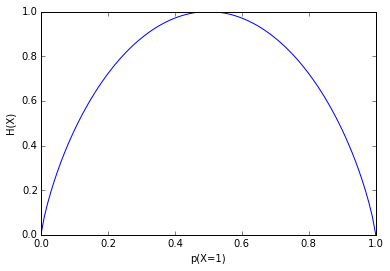

In [20]:
eps = np.finfo(float).eps
p = np.linspace(0+eps, 1-eps, 100)
H = np.empty(p.shape)
for i, theta in enumerate(p):
    H[i] = calc_entropy(np.array([theta, 1-theta]))

pl.plot(p, H)
pl.xlabel('p(X=1)'); pl.ylabel('H(X)')
pl.show()

##3.2 Kullback-Leibler (KL) divergence or Relative Entropy

KL divergence measures how dissimilar two probability distributions are.
\begin{equation}
    \mathrm{KL}(p||q) := \sum_x p(x) log_n \frac{p(x)}{q(x)}
\end{equation}

In [21]:
def calc_KL(p, q):
    return np.sum(p*np.log2(p/q)) #from scipy import stats as st; st.entropy(p, q, base=2)

print('KL(p||p)', calc_KL(pX, pX)) #Note min(KL) is zero when iff p=q
print('KL(p||q)', calc_KL(pX, pY))
print('KL(q||p)', calc_KL(pY, pX)) # Note KL is not symmetric

KL(p||p) 0.0
KL(p||q) 0.0186218808783
KL(q||p) 0.01822639883


##3.3 Mutual Information (MI)  - optional 

MI measures how much knowing one random variable tells about the other (dependence).
\begin{equation}
    \mathrm{I}(X;Y) := \sum_x \sum_y p(x,y) log_n \frac{p(x,y)}{p(x) p(y)}
\end{equation}

Note: If two random variables are independent, then $p(X,Y)=p(X)p(Y)$ and hence $\mathrm{I}(X;Y)=0$.

For two events (not random variables), pointwise mutual information (PMI) is defined as,
\begin{equation}
    \mathrm{PMI}(x,y) := log_n \frac{p(x,y)}{p(x) p(y)}
\end{equation}


**Exercise 3.3.1** Associated Press Newswire Corpus (1988) contains 44 million words. Individual words "set", "up", "off", "out", "on", "in" and "about" have been found 13046,64601, 20693, 47956, 258170, 739932 and 82319 times respectively. Similarly, hypothetical phrasal verbs "set up", "set off", "set out", "set on", "set in" and "set about" have been found 2713, 463, 301, 162, 795 and 16 respectively. Use PMI to determine which of the hypothetical phrasal verbs are more likely to be commonly used phrasal verbs. 

Reference: W.C. Kenneth and H. Patrick. "Word association norms, mutual information, and lexicography". Computational Linguistics. vol.16(1) 1990.

In [5]:
#Answer
import numpy as np

verb = np.array([13046])[:,np.newaxis]
preps_list = ['up', 'off', 'out', 'on', 'in', 'about']
preps = np.array([64601, 20693, 47956, 258170, 739932, 82319])[:,np.newaxis]
co_oc = np.array([2713, 463, 301, 162, 795, 16])[:,np.newaxis]

#corpus of 1988 Associated Press newswire

def PMI(p_x, p_y, p_xy, total):
    return np.log2(total*p_xy/(p_x*p_y)) #/ (-np.log2(p_xy/total)) normalization

for i in range(preps.shape[0]):
    PMI_score = PMI(verb[0,:], preps[i, :], co_oc[i, :], 44E6) 
    print('PMI of set ' + preps_list[i], PMI_score)
    
#Note: This corpus is old and most of the articles are written in American English by journalists. 

PMI of set up [ 7.14608473]
PMI of set off [ 6.23769346]
PMI of set out [ 4.40387624]
PMI of set on [ 1.08156844]
PMI of set in [ 1.85745816]
PMI of set about [-0.60925756]


## 4. Bayes' Rule

\begin{equation}
    p(Y=y|X=x) = \frac{p(X=x|Y=y) p(Y=y)}{\sum_{y'} p(X=x|Y=y')p(Y=y')}
\end{equation}

**Exercise 4.1.1** 

0.4% of a population is having a particular genetic disorder. In order to test the disorder, a person has undergone a medical test which has a **sensitivity** of 80% (if a person has the disorder, the test result will be positive with a probability of 0.8) and a **false alarm** of 10%. If the test is positive, what is the probability of person the having the particular genetic disorder?

Answer


Let $x=1$ be positive test results and $x=0$ be negative test results.

Let $y=1$ be the person has a cancer and $y=0$ be the person does not have a cancer.

* prior: $p(Y=1) = 0.004$ and $p(Y=0) = 1-0.004 = 0.996$

* sensitivity: $p(X=1|Y=1) = 0.8$

* false positive/alarm: $p(X=1|Y=0) = 0.1$

\begin{equation}
    p(Y=1|X=1) = \frac{p(X=1|Y=1) p(Y=1)}{p(X=1|Y=1)p(Y=1)+p(X=1|Y=0)p(Y=0)} 
    = \frac{0.8 \times 0.004}{0.8 \times 0.004 + 0.1 \times 0.996}
    = 0.0311 \approx 3\%
\end{equation}